In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
surveyRaw = pd.read_csv('Copy of Relationship Survey.csv')
pd.options.display.max_columns = None
# display(surveyRaw)
titles = pd.read_csv('data_titles.csv')
surveyRaw.drop(['Respondent ID', 'Collector ID','Start Date','End Date','IP Address','Email Address','First Name','Last Name','Custom Data 1','Unnamed: 11','Unnamed: 13','Unnamed: 18','Unnamed: 22','Unnamed: 26','Unnamed: 30','Unnamed: 34','Unnamed: 38','Unnamed: 41','Unnamed: 44','Unnamed: 47','Unnamed: 50','Indicate if the statement applies to you during the time with your significant other (please check all that apply)','Unnamed: 57','Unnamed: 63','Unnamed: 64','Unnamed: 66','Unnamed: 76','Unnamed: 79'], axis = 1, inplace=True)

In [3]:
titles

,Education/Knowledge/Street Smarts,partner_education_score,difference_education_score,Financial Choices,partner_financial,difference_financial,Confidence/Self-Esteem,partner_confidence,difference_confidence,Religious/Spiritual Values,partner_religious,difference_religious,Materialism/Superficiality,partner_materialism,difference_materialism,Image/Fashion Sense/Body Modification,partner_image,differnece_image,Occupation/Work Ethic/Self-Discipline,partner_occupation,difference_occupation,"Household Care, Maintenance and Cleanliness",partner_house,difference_house,Communication Style/Manners,partner_communication,difference_communication,Artsy/Creative/Musical,partner_artsy,difference_artsy,Charitable/Philanthropic,partner_charity,difference_charity,Pursuing a Greater Purpose,partner_purpose,difference_purpose,Social Status/Sociability,partner_social,difference_social,"Cultured/Well-traveled/""Woke""",partner_culture,difference_culture,Self-Care/Personal Hygiene/Cleanliness,partner_care,difference_care,Honesty/Dependable/Reliable,partner_honesty,difference_honesty,Family Values,partner_family,difference_family
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

surveyRaw = surveyRaw.dropna(subset=surveyRaw.columns[6:19])
surveyRaw.head()

,How old are you?,What is your gender?,What is your sexual orientation?,What is your relationship status?,How long were you/have you been together?,"How you would describe this relationship? Please answer as honestly as you can. (To be out of someone's league means to be 'better' than them. E.g. ""He/She was out of my league"" = He/She was 'better' than me. E.g. ""I was out of his/her league"" = I was 'better' than him/her)",Which value is/was most important to you in your current relationship or at the end of your relationship. (A value is a lifestyle choice or learned behavior that you respect/admire in a person.),How would you rate yourself for this value in your current relationship or at the end of your relationship.,How would you rate your significant other for this value in your current relationship or at the end of your relationship.,Which value is/was 2nd most important to you in your current relationship or at the end of your relationship.,How would you rate yourself for this value in your current relationship or at the end of your relationship.,How would you rate your significant other for this value in your current relationship or at the end of your relationship.,Which value is/was 3rd most important to you in your current relationship or at the end of your relationship.,How would you rate yourself for this value in your current relationship or at the end of your relationship..1,How would you rate your significant other for this value in your current relationship or at the end of your relationship..1,Which value is/was 4th most important to you in your current relationship or at the end of your relationship.,How would you rate yourself for this value in your current relationship or at the end of your relationship..2,How would you rate your significant other for this value in your current relationship or at the end of your relationship..2,Which value is/was 5th most important to you in your current relationship or at the end of your relationship.,How would you rate yourself for this value in your current relationship or at the end of your relationship..3,How would you rate your significant other for this value in your current relationship or at the end of your relationship..3,"Which trait are/were you MOST drawn to as your ""type"" in your current relationship or at the end of your relationship?(A type is an inherent personality or physical trait that you are drawn to and/or extremely attracted to.)",How would you rate your significant other for this trait in your current relationship or at the end of your relationship.,"Which trait are/were you 2nd most drawn to as your ""type"" in your current relationship or at the end of your relationship?",How would you rate your significant other for this trait in your current relationship or at the end of your relationship..1,"Which trait are/were you 3rd most drawn to as your ""type"" in your current relationship or at the end of your relationship?",How would you rate your significant other for this trait in your current relationship or at the end of your relationship..2,"Which trait are/were you 4th most drawn to as your ""type"" in your current relationship or at the end of your relationship?",How would you rate your significant other for this trait in your current relationship or at the end of your relationship..3,"Which trait are/were you 5th most drawn to as your ""type"" in your current relationship or at the end of your relationship?",How would you rate your significant other for this trait in your current relationship or at the end of your relationship..4,Please indicate your decision-making process when you entered this relationship/situationship,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 65,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 77,Unnamed: 78,Unnamed: 80,Unnamed: 81,Unnamed: 82,Please place the slider where it most accurately 

In [5]:

# iterate thru dataframe
for i, j in surveyRaw.iterrows():
    if i == 0:
        continue
    # check 
#     print(i)

    ls = [0 for x in range(len(titles.columns))]

    for k in range(6,19,3):
        if j[k] in titles.columns:
            ls[titles.columns.get_loc(j[k])] = int(j[k+1])
            ls[titles.columns.get_loc(j[k]) + 1] = int(j[k+2])
            ls[titles.columns.get_loc(j[k]) + 2] = abs((int(j[k+1])+10) - (int(j[k+2])+10))
        
    titles.loc[i-1]=ls

titles

,Education/Knowledge/Street Smarts,partner_education_score,difference_education_score,Financial Choices,partner_financial,difference_financial,Confidence/Self-Esteem,partner_confidence,difference_confidence,Religious/Spiritual Values,partner_religious,difference_religious,Materialism/Superficiality,partner_materialism,difference_materialism,Image/Fashion Sense/Body Modification,partner_image,differnece_image,Occupation/Work Ethic/Self-Discipline,partner_occupation,difference_occupation,"Household Care, Maintenance and Cleanliness",partner_house,difference_house,Communication Style/Manners,partner_communication,difference_communication,Artsy/Creative/Musical,partner_artsy,difference_artsy,Charitable/Philanthropic,partner_charity,difference_charity,Pursuing a Greater Purpose,partner_purpose,difference_purpose,Social Status/Sociability,partner_social,difference_social,"Cultured/Well-traveled/""Woke""",partner_culture,difference_culture,Self-Care/Personal Hygiene/Cleanliness,partner_care,difference_care,Honesty/Dependable/Reliable,partner_honesty,difference_honesty,Family Values,partner_family,difference_family
0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,7.0,4.0,3.0,8.0,5.0,3.0
1,5.0,6.0,1.0,0.0,0.0,0.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,2.0,4.0,7.0,3.0
2,8.0,8.0,0.0,9.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,10.0,1.0,10.0,10.0,0.0
3,8.0,5.0,3.0,6.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,8.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,8.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,9.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,2.0,9.0,8.0,1.0,0.0,0.0,0.0,10.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,5.0,4.0,0.0,0.0,0.0
77,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,4.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,2.0,0.0,0.0,0.0,7.0,5.0,2.0,0.0,0.0,0.0
78,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,9.0,2.0,10.0,10.0,0.0,9.0,10.0,1.0,0.0,0.0,0.0
79,0.0,0.0,0.0,9.0,9.0,0.0,9.0,9.0,0.0,6.0,9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0


In [6]:
titles.reset_index(inplace=True, drop = True)
titles = titles.drop(['difference_education_score','difference_financial','difference_confidence','difference_religious','difference_materialism','differnece_image','difference_occupation','difference_house','difference_communication','difference_artsy','difference_charity','difference_purpose','difference_social','difference_culture','difference_care','difference_honesty','difference_family'],axis = 1)
titles



,Education/Knowledge/Street Smarts,partner_education_score,Financial Choices,partner_financial,Confidence/Self-Esteem,partner_confidence,Religious/Spiritual Values,partner_religious,Materialism/Superficiality,partner_materialism,Image/Fashion Sense/Body Modification,partner_image,Occupation/Work Ethic/Self-Discipline,partner_occupation,"Household Care, Maintenance and Cleanliness",partner_house,Communication Style/Manners,partner_communication,Artsy/Creative/Musical,partner_artsy,Charitable/Philanthropic,partner_charity,Pursuing a Greater Purpose,partner_purpose,Social Status/Sociability,partner_social,"Cultured/Well-traveled/""Woke""",partner_culture,Self-Care/Personal Hygiene/Cleanliness,partner_care,Honesty/Dependable/Reliable,partner_honesty,Family Values,partner_family
0,0.0,0.0,0.0,0.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,7.0,4.0,8.0,5.0
1,5.0,6.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,4.0,7.0
2,8.0,8.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,10.0,10.0,10.0
3,8.0,5.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,8.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,9.0,8.0,0.0,0.0,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,5.0,0.0,0.0
74,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,0.0,0.0,7.0,5.0,0.0,0.0
75,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,9.0,10.0,10.0,9.0,10.0,0.0,0.0
76,0.0,0.0,9.0,9.0,9.0,9.0,6.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0


In [7]:
# titles.drop(['difference_education_score','difference_financial','difference_confidence','difference_religious','difference_materialism','differnece_image','difference_occupation','difference_house','difference_communication','difference_artsy','difference_charity','difference_purpose','difference_social','difference_culture','difference_care','difference_honesty','difference_family'],axis = 1)

In [8]:
successful = surveyRaw.iloc[:,32:55]
successful = successful.fillna(0)
successful

,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 65,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 77,Unnamed: 78,Unnamed: 80,Unnamed: 81,Unnamed: 82
0,I was jealous,She/He was jealous,He/she was manipulative,I was sexually/physically attracted in the beg...,I often felt suffocated,I often wanted more attention/affection than m...,I felt I could do better,I felt I was not good enough for him/her,I had unhealthy coping mechanisms to deal with...,I often felt emotionally drained,I often felt depressed or anxious or angry,I was verbally and/or emotionally abused,I verbally and/or emotionally abused him/her,I often shut down,He/she often shut down,My privacy was often not respected,We had on/off relationship/situationship,I often felt judged by my partner,I felt controlled,I felt trapped/stuck in the relationship/situa...,Often compared my partner to other people or o...,We moved too fast,I often felt my partner was showing off
1,0,0,He/she was manipulative,0,0,0,0,0,0,I often felt emotionally drained,0,I was verbally and/or emotionally abused,0,0,0,0,0,0,0,0,0,0,0
2,I was jealous,0,0,I was sexually/physically attracted in the beg...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,I often wanted more attention/affection than m...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,I was sexually/physically attracted in the beg...,0,0,0,0,0,0,0,0,0,0,0,0,We had on/off relationship/situationship,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,I was jealous,0,0,I was sexually/physically attracted in the beg...,0,I often wanted more attention/affection than m...,I felt I could do better,I felt I was not good enough for him/her,0,0,I often felt depressed or anxious or angry,0,0,0,He/she often shut down,0,We had on/off relationship/situationship,0,0,0,0,We moved too fast,0
78,0,0,He/she was manipulative,0,0,0,0,0,0,I often felt emotionally drained,0,0,0,0,0,0,0,0,0,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
successful.reset_index(inplace=True, drop = True)
successful

,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 65,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 77,Unnamed: 78,Unnamed: 80,Unnamed: 81,Unnamed: 82
0,I was jealous,She/He was jealous,He/she was manipulative,I was sexually/physically attracted in the beg...,I often felt suffocated,I often wanted more attention/affection than m...,I felt I could do better,I felt I was not good enough for him/her,I had unhealthy coping mechanisms to deal with...,I often felt emotionally drained,I often felt depressed or anxious or angry,I was verbally and/or emotionally abused,I verbally and/or emotionally abused him/her,I often shut down,He/she often shut down,My privacy was often not respected,We had on/off relationship/situationship,I often felt judged by my partner,I felt controlled,I felt trapped/stuck in the relationship/situa...,Often compared my partner to other people or o...,We moved too fast,I often felt my partner was showing off
1,0,0,He/she was manipulative,0,0,0,0,0,0,I often felt emotionally drained,0,I was verbally and/or emotionally abused,0,0,0,0,0,0,0,0,0,0,0
2,I was jealous,0,0,I was sexually/physically attracted in the beg...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,I often wanted more attention/affection than m...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,I was sexually/physically attracted in the beg...,0,0,0,0,0,0,0,0,0,0,0,0,We had on/off relationship/situationship,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,I was jealous,0,0,I was sexually/physically attracted in the beg...,0,I often wanted more attention/affection than m...,I felt I could do better,I felt I was not good enough for him/her,0,0,I often felt depressed or anxious or angry,0,0,0,He/she often shut down,0,We had on/off relationship/situationship,0,0,0,0,We moved too fast,0
75,0,0,He/she was manipulative,0,0,0,0,0,0,I often felt emotionally drained,0,0,0,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# need to change all the text values in the successful data to 1(above)
# then sum each row and add column with sum value
# the summed column should be appended to the titles dataframe
total_list = [0]
for i, column in successful.iterrows():
    if i == 0:
        continue
#     print(len(column))
    total = 0
    for j in range(len(column)):
        if column[j] != 0:
#             print(i,j)
            successful.iloc[i,j] = 1
            total += 1
    total_list.append(total)
#     break
successful['Total'] = total_list
successful

,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 65,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 77,Unnamed: 78,Unnamed: 80,Unnamed: 81,Unnamed: 82,Total
0,I was jealous,She/He was jealous,He/she was manipulative,I was sexually/physically attracted in the beg...,I often felt suffocated,I often wanted more attention/affection than m...,I felt I could do better,I felt I was not good enough for him/her,I had unhealthy coping mechanisms to deal with...,I often felt emotionally drained,I often felt depressed or anxious or angry,I was verbally and/or emotionally abused,I verbally and/or emotionally abused him/her,I often shut down,He/she often shut down,My privacy was often not respected,We had on/off relationship/situationship,I often felt judged by my partner,I felt controlled,I felt trapped/stuck in the relationship/situa...,Often compared my partner to other people or o...,We moved too fast,I often felt my partner was showing off,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,3
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,9
75,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
titles

,Education/Knowledge/Street Smarts,partner_education_score,Financial Choices,partner_financial,Confidence/Self-Esteem,partner_confidence,Religious/Spiritual Values,partner_religious,Materialism/Superficiality,partner_materialism,Image/Fashion Sense/Body Modification,partner_image,Occupation/Work Ethic/Self-Discipline,partner_occupation,"Household Care, Maintenance and Cleanliness",partner_house,Communication Style/Manners,partner_communication,Artsy/Creative/Musical,partner_artsy,Charitable/Philanthropic,partner_charity,Pursuing a Greater Purpose,partner_purpose,Social Status/Sociability,partner_social,"Cultured/Well-traveled/""Woke""",partner_culture,Self-Care/Personal Hygiene/Cleanliness,partner_care,Honesty/Dependable/Reliable,partner_honesty,Family Values,partner_family
0,0.0,0.0,0.0,0.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,7.0,4.0,8.0,5.0
1,5.0,6.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,4.0,7.0
2,8.0,8.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,10.0,10.0,10.0
3,8.0,5.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,8.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,9.0,8.0,0.0,0.0,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,5.0,0.0,0.0
74,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,0.0,0.0,7.0,5.0,0.0,0.0
75,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,9.0,10.0,10.0,9.0,10.0,0.0,0.0
76,0.0,0.0,9.0,9.0,9.0,9.0,6.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0


# Machinge learning using multiple linear regression sklearn

In [12]:

from sklearn.datasets import make_regression
# Change X axis to take out the successfull data
X = titles
y = successful.loc[1:,['Total']]
print(X.shape, y.shape)

(78, 34) (78, 1)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.6415376365970977


In [15]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [16]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7536289634579292
Testing Score: -0.24394085745010852


In [17]:
print(model.coef_)
print(model.intercept_)
print(X_test)
X_test.shape


[[-0.23594546  0.35472752  0.38716452 -0.55451202 -0.16938121 -0.16615288
  -1.06329373  0.86175304 -0.03785461 -0.04731826 -0.00336482  0.40253555
  -0.09684617 -0.04064686 -0.38566244  0.188898    0.08248514 -0.10460503
   0.19384377 -0.38423145  0.26622665 -0.36956317  0.36232085 -0.17427375
   0.08448398 -0.21408435  0.8287806  -1.06317238  1.35428706 -1.32451214
   0.52285123 -0.62688005  0.00813679 -0.0298048 ]]
[4.95138288]
    Education/Knowledge/Street Smarts  partner_education_score  \
46                                0.0                      0.0   
19                                0.0                      0.0   
44                                0.0                      0.0   
5                                 7.0                      8.0   
24                               10.0                      8.0   
1                                 5.0                      6.0   
33                                5.0                      8.0   
42                                0.0

(20, 34)

Text(0.5, 1.0, 'Residual Plot')

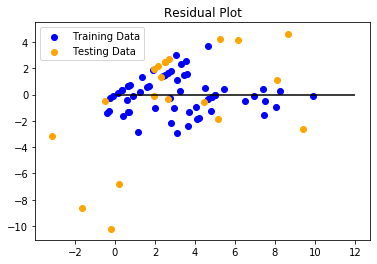

In [18]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [19]:
model.coef_

array([[-0.23594546,  0.35472752,  0.38716452, -0.55451202, -0.16938121,
        -0.16615288, -1.06329373,  0.86175304, -0.03785461, -0.04731826,
        -0.00336482,  0.40253555, -0.09684617, -0.04064686, -0.38566244,
         0.188898  ,  0.08248514, -0.10460503,  0.19384377, -0.38423145,
         0.26622665, -0.36956317,  0.36232085, -0.17427375,  0.08448398,
        -0.21408435,  0.8287806 , -1.06317238,  1.35428706, -1.32451214,
         0.52285123, -0.62688005,  0.00813679, -0.0298048 ]])

In [20]:
model.intercept_

array([4.95138288])